# **import libraries**

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **import Data**

In [ ]:
file1 = files.upload()
file1 = list(file1.keys())[0]

Saving BlinkIT  Data.csv to BlinkIT  Data (3).csv


In [ ]:
df = pd.read_csv(file1)

# **Sample Data**

In [ ]:
 df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [ ]:
df.shape

(8523, 12)

# **Data cleaning**

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat','low fat':'Low Fat','reg': 'Regular'})

In [ ]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

# **KPI requirements**

In [ ]:
# total sales
total_sales = df['Sales'].sum()

#avg sales
avg_sales = df['Sales'].mean()

#no of items sold
no_of_items_sold = df['Sales'].count()

#avg rating
avg_rating = df['Rating'].mean()

#display
print(f'Total Sales: ${total_sales:,.1f}')
print(f'Average Sales: {avg_sales:,.0f}')
print(f'Number of Items Sold: {no_of_items_sold:,.0f}')
print(f'Average Rating: {avg_rating:,.1f}')


Total Sales: $1,201,681.5
Average Sales: 141
Number of Items Sold: 8,523
Average Rating: 4.0


# **Charts requirements**

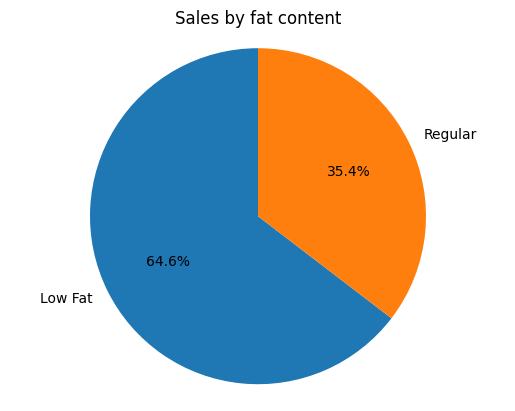

In [ ]:
#total sales by fat content
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f%%', startangle = 90)
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()


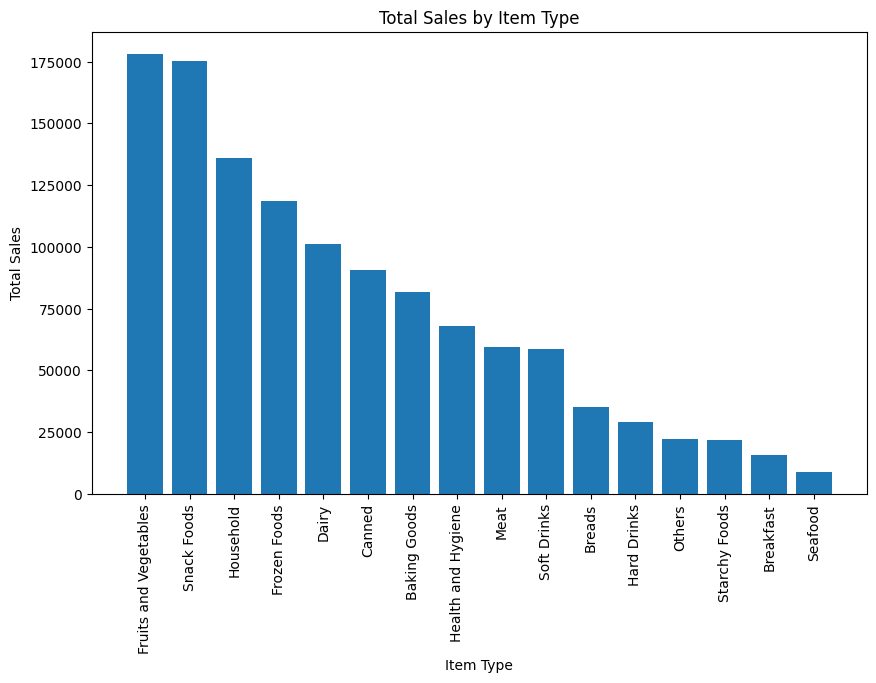

In [ ]:
#total sales by item type
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.show()


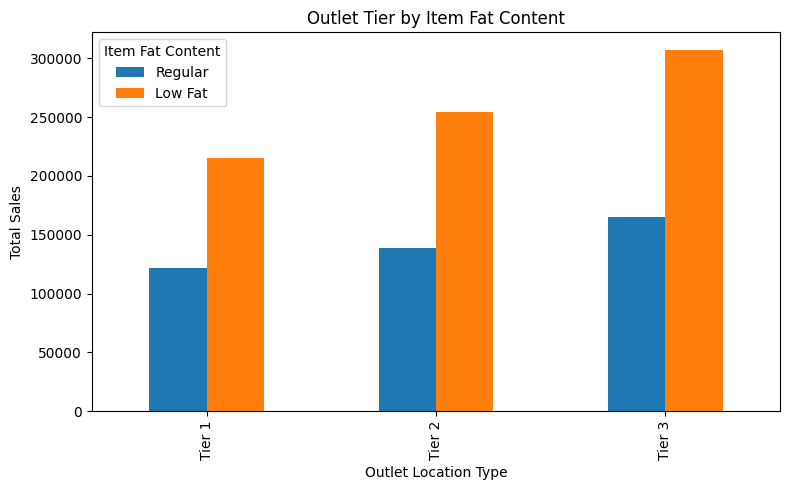

In [ ]:
#fat content by outlet for total sales
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar', figsize = (8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()


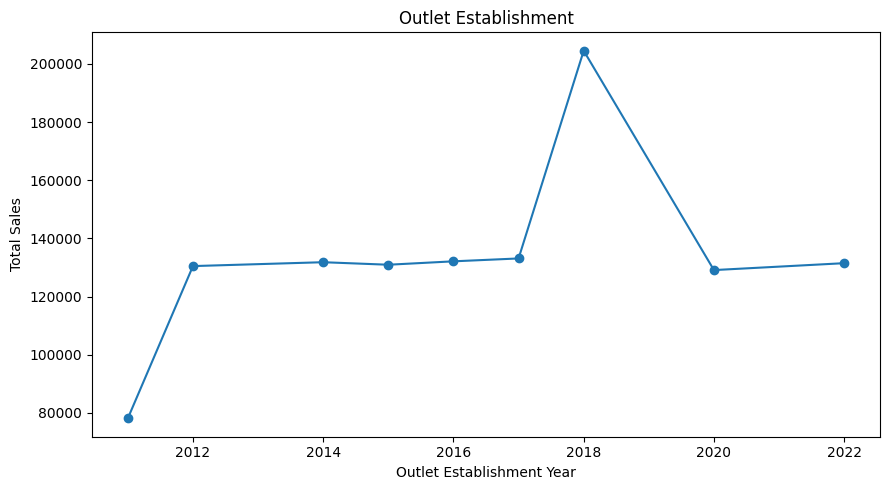

In [ ]:
#total sales by outlet establishment

sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-')


plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

plt.tight_layout()
plt.show()

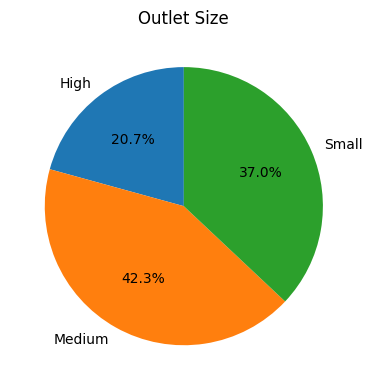

In [ ]:
#sales by outlet size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize = (4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%.1f%%',startangle= 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

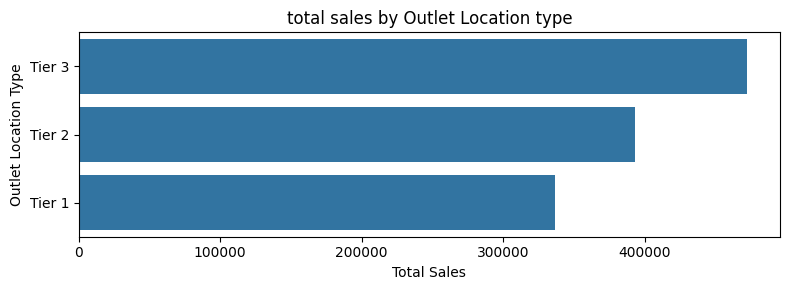

In [ ]:
#sales by outlet location

sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending = False)

plt.figure(figsize = (8,3))
ax = sns.barplot(x = 'Sales', y = 'Outlet Location Type', data = sales_by_location)

plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.title('total sales by Outlet Location type')
plt.tight_layout()
plt.show()